In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("Mall_Customers.csv")

In [6]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
data.shape

(200, 5)

In [8]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

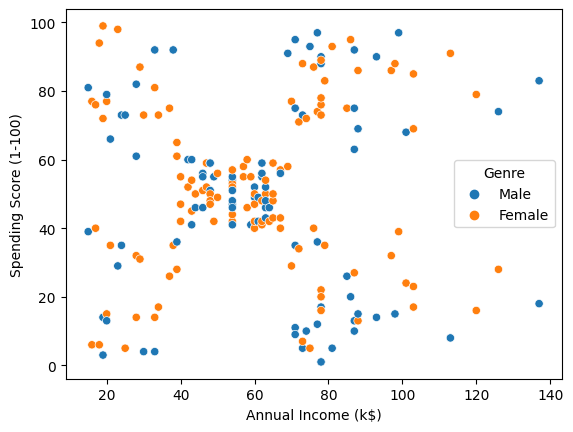

In [12]:
import warnings
warnings.filterwarnings('ignore')
sb.scatterplot(data=data,x="Annual Income (k$)" , y="Spending Score (1-100)" , hue="Genre")

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

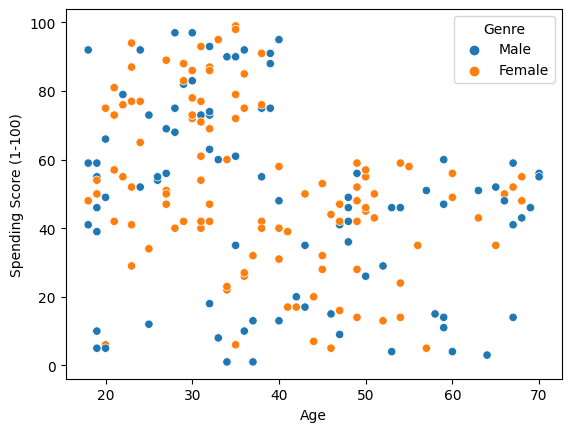

In [13]:
sb.scatterplot(data=data, x="Age", y="Spending Score (1-100)", hue="Genre")

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

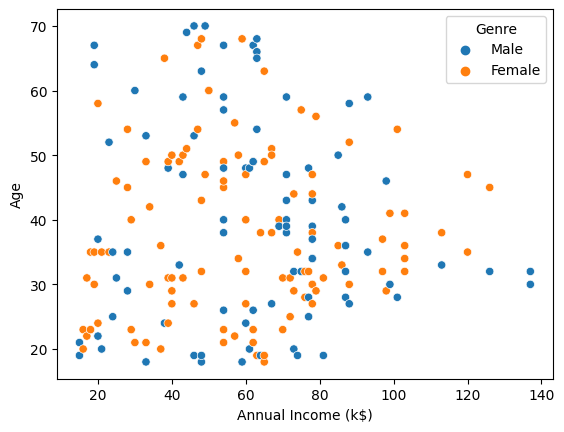

In [14]:
sb.scatterplot(data=data,x="Annual Income (k$)" , y="Age" , hue="Genre")

<Axes: xlabel='Spending Score (1-100)', ylabel='Age'>

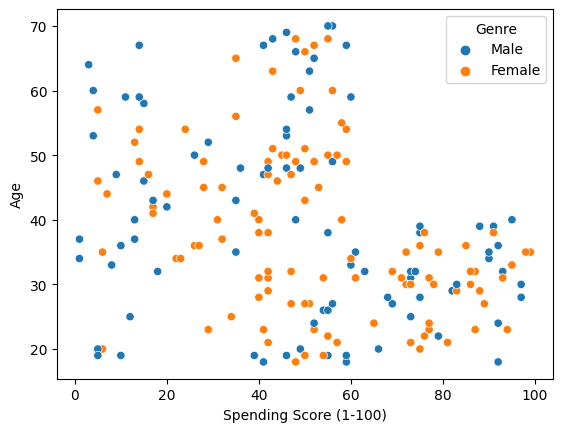

In [15]:
sb.scatterplot(data=data,x="Spending Score (1-100)" , y="Age" , hue="Genre")

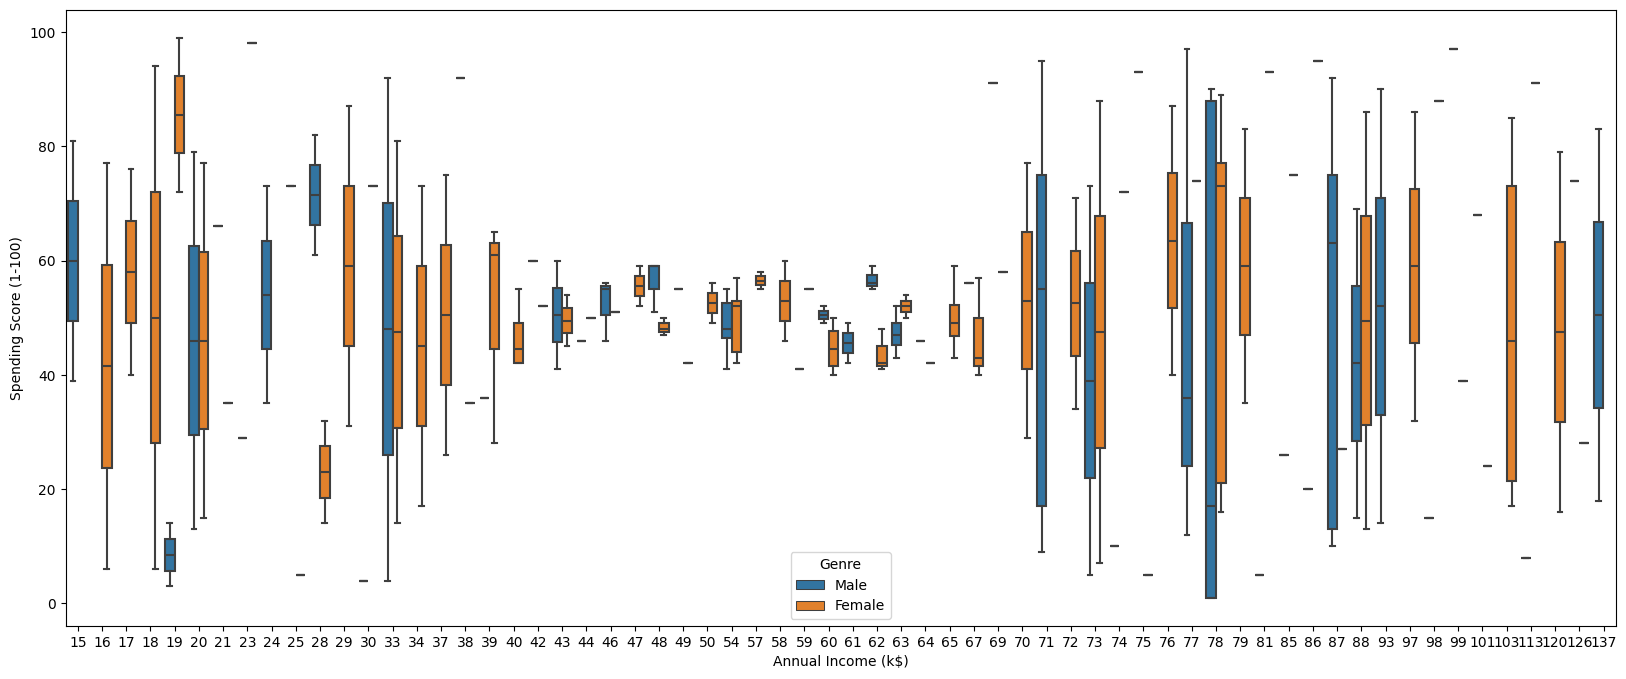

In [24]:
plt.figure(figsize=(20,8))
sb.boxplot(data=data , x="Annual Income (k$)" , y="Spending Score (1-100)" , hue="Genre")
plt.show()

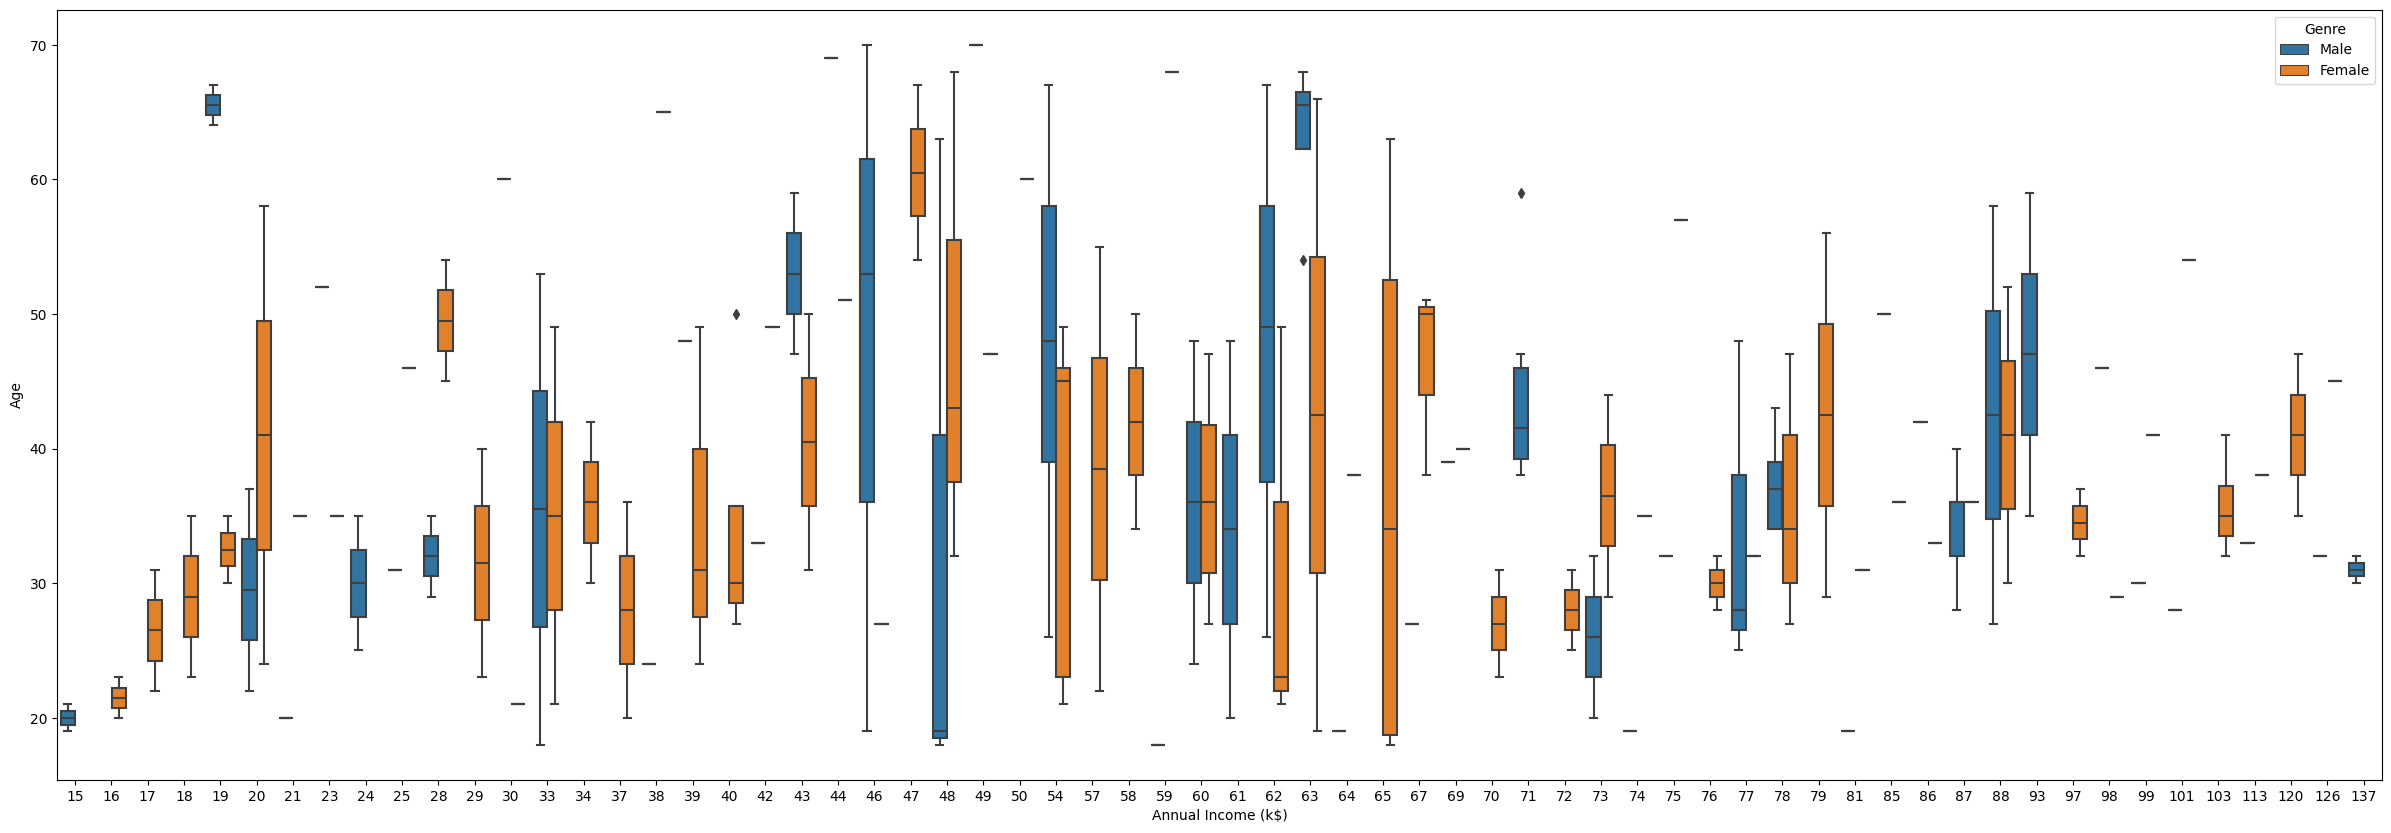

In [20]:
plt.figure(figsize=(30,10))
sb.boxplot(data=data , x="Annual Income (k$)" , y="Age" , hue="Genre")
plt.show()

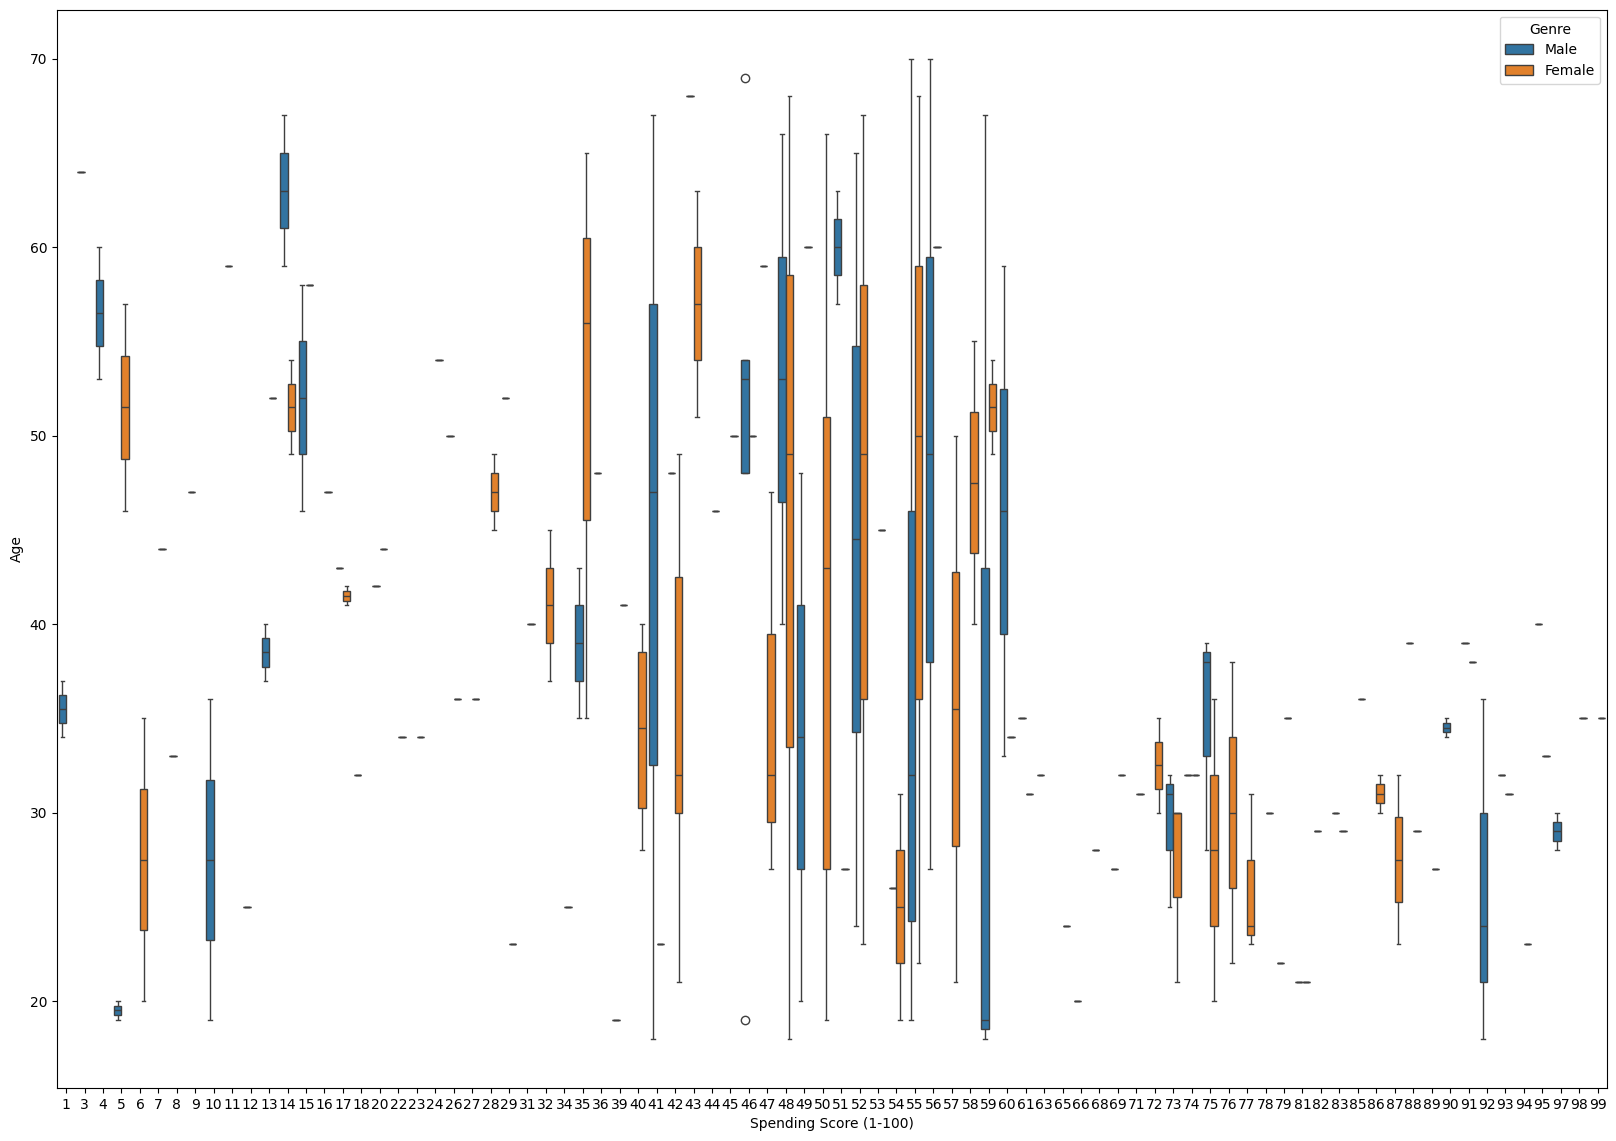

In [19]:
plt.figure(figsize=(20,14))
sb.boxplot(data=data , x="Spending Score (1-100)" , y="Age" , hue="Genre")
plt.show()

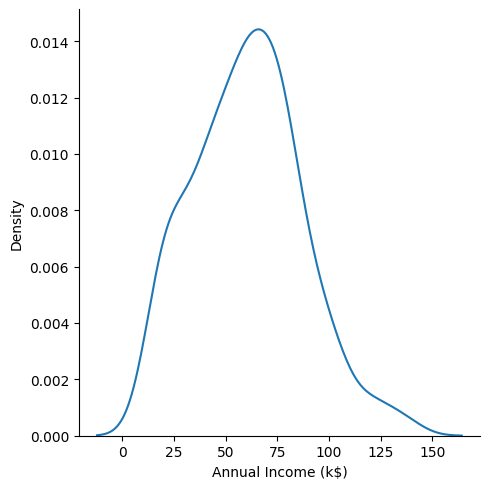

In [28]:
sb.displot(data=data , x="Annual Income (k$)",kind="kde")

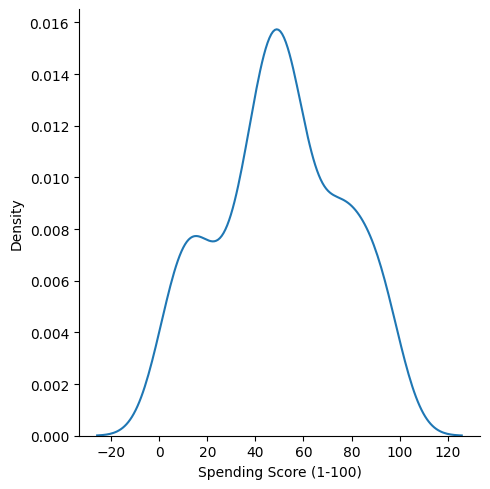

In [34]:
sb.displot(data=data , x="Spending Score (1-100)",kind = "kde")

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

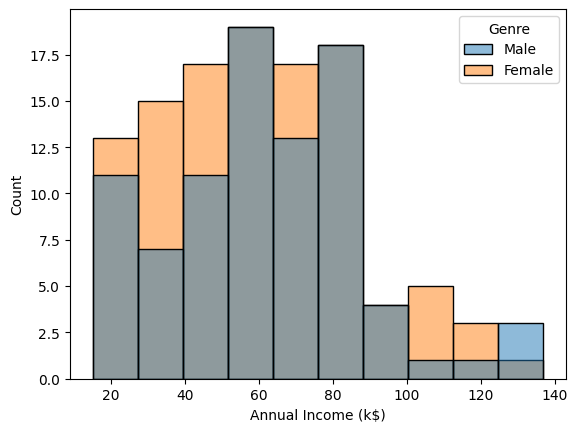

In [31]:
sb.histplot(data=data , x="Annual Income (k$)" , hue="Genre")

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

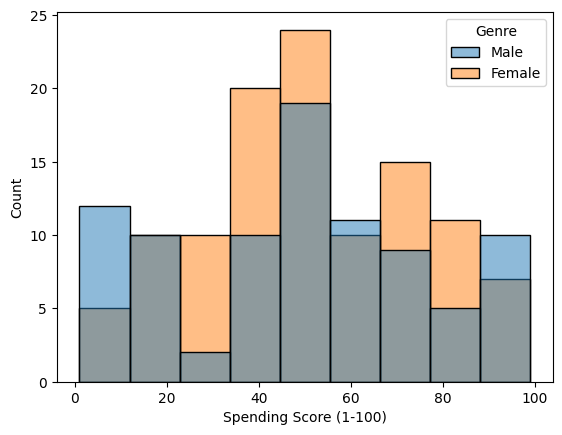

In [26]:
sb.histplot(data=data , x="Spending Score (1-100)" , hue="Genre")

([<matplotlib.patches.Wedge at 0x21f1ba6f5e0>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56.0%'),
  Text(0.11242879316591654, -0.5893723495951058, '44.0%')])

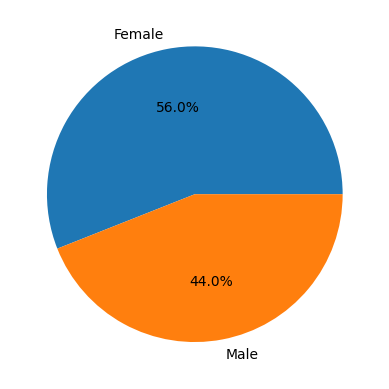

In [33]:
count=data["Genre"].value_counts()
plt.pie(count , labels=count.index , autopct='%.1f%%')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

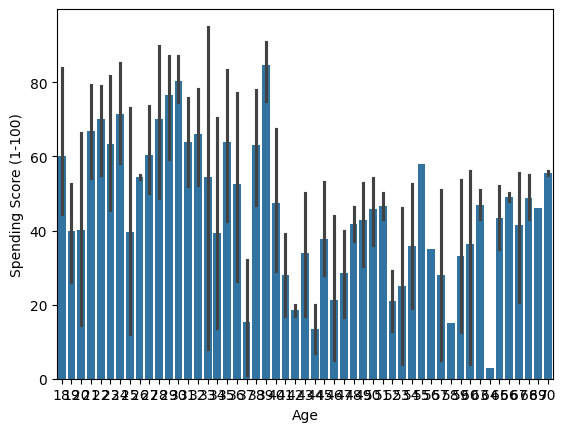

In [36]:
sb.barplot(data=data, x="Age", y="Spending Score (1-100)")

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

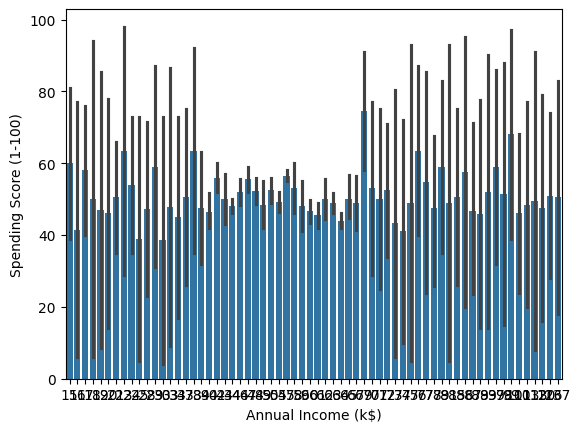

In [38]:
sb.barplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)")

In [40]:
x=data.iloc[:, 3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0,n_init='auto') 
kmeans.fit(x)   

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [42]:
kmeans.cluster_centers_

array([[44.15447154, 49.82926829],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

In [43]:
kmeans.inertia_

106348.37306211122

In [44]:
l=kmeans.labels_

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

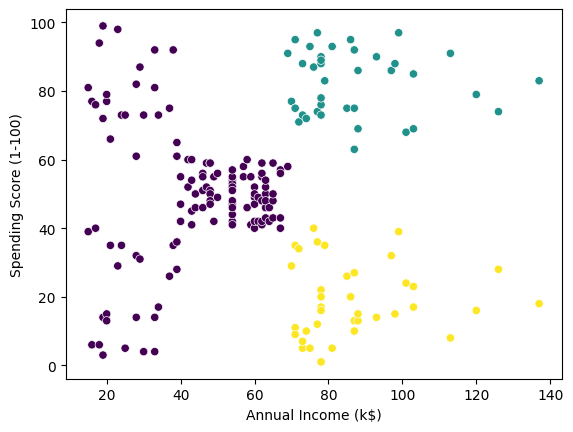

In [46]:
sb.scatterplot(data=x, x=x["Annual Income (k$)"], y=x["Spending Score (1-100)"],c=l)

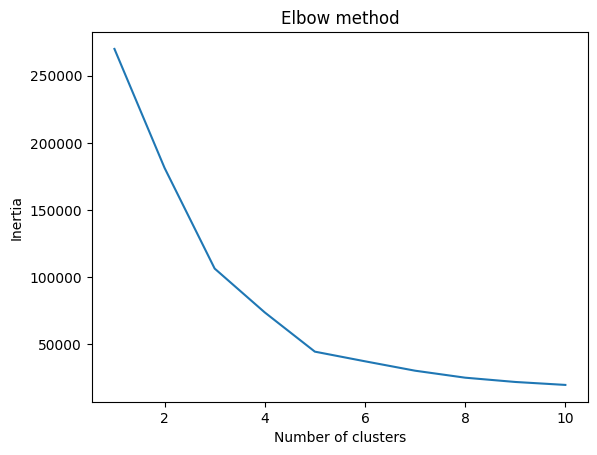

In [47]:
l1= []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, n_init = 10, random_state = 0)
    kmeans.fit(x)
    l1.append(kmeans.inertia_)
plt.plot(range(1, 11), l1)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

In [48]:
kmeans = KMeans(n_clusters=5, random_state=0,n_init='auto') 
kmeans.fit(x) 

KMeans(n_clusters=5, n_init='auto', random_state=0)

In [49]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [50]:
l=kmeans.labels_

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

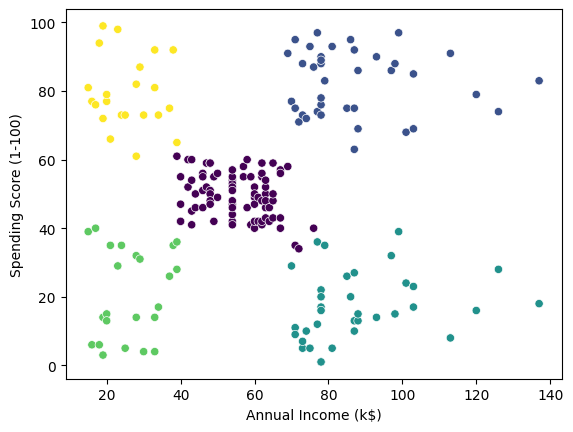

In [52]:
sb.scatterplot(data=x, x=x["Annual Income (k$)"], y=x["Spending Score (1-100)"],c=l)

In [1]:
l1= []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, n_init = 10, random_state = 0)
    kmeans.fit(x)
    l1.append(kmeans.inertia_)
plt.plot(range(1, 20), l1)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

NameError: name 'KMeans' is not defined